**TASK-12A:** Please use linear (PCA) and nonlinear (LLE, ISOMAP) dimensionality reduction methods using MR metrics to visualize the patients with their different CDRGLOB values/levels to understand whether there are visible patterns. Please first only use the first two dimensions in your visualizations.





In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [115]:
data = pd.read_excel("/content/CDR_6_MRIfull.xlsx")
data

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,1,0,0,0,0,0,0,0,0,...,0.022229,0.002573,0.012313,0.001690,0.013390,0.002362,0.008422,0.001901,0.000727,0.001242
1,2,1,0,0,0,0,0,0,0,0,...,0.024551,0.002161,0.009114,0.001402,0.011982,0.001958,0.007428,0.001745,0.001002,0.001436
2,2,1,0,0,0,0,0,0,0,0,...,0.023044,0.002528,0.011245,0.001631,0.014259,0.002555,0.009018,0.001929,0.001011,0.001175
3,1,1,0,0,0,0,0,0,0,1,...,0.025236,0.001905,0.010176,0.001439,0.014644,0.001889,0.008720,0.001722,0.001107,0.001664
4,2,1,0,0,0,0,0,0,0,0,...,0.024523,0.001865,0.009781,0.001139,0.014733,0.001973,0.008312,0.001255,0.000858,0.001543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,1,0,0,0,0,0,0,0,2,...,0.025420,0.002925,0.011830,0.001772,0.012750,0.002526,0.009636,0.002026,0.001097,0.001902
1596,2,1,0,0,0,0,0,0,0,0,...,0.024433,0.002743,0.010769,0.001696,0.013166,0.002124,0.007746,0.002225,0.000581,0.001011
1597,1,2,2,2,2,2,2,2,2,7,...,0.028646,0.002051,0.010201,0.001462,0.012770,0.001882,0.010078,0.001834,0.000549,0.001365
1598,2,1,0,0,0,0,0,0,0,2,...,0.026394,0.002981,0.009892,0.001980,0.014052,0.002180,0.009527,0.002300,0.001162,0.001734


In [116]:
X = data.iloc[:,15:]
pca = PCA(7)  
pca_out = pca.fit_transform(X)
pca_out.shape

(1600, 7)

In [117]:
y = data["CDRGLOB"]
data.drop(columns=["CDRGLOB"], inplace = True)

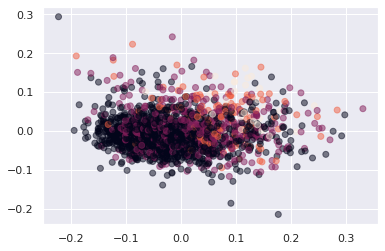

In [118]:
plt.scatter(pca_out[:, 0], pca_out[:, 1], alpha=0.5, c=y)

In [119]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=10, n_components=7, method='modified',
                               eigen_solver='dense')
LLE_out = model.fit_transform(X)
LLE_out

array([[-0.04164943, -0.02359942, -0.03586949, ...,  0.03290451,
         0.06658073, -0.02955191],
       [-0.0424528 , -0.00479562, -0.06008425, ...,  0.03557275,
         0.09715532,  0.00242215],
       [-0.03764981, -0.00833879, -0.04201455, ...,  0.01970713,
         0.06114411,  0.01018281],
       ...,
       [ 0.07419177, -0.04182636, -0.10067059, ..., -0.03284117,
        -0.05796338, -0.04144033],
       [ 0.07912314, -0.03950594, -0.11475838, ..., -0.02778912,
        -0.08822422, -0.02021638],
       [ 0.0867643 , -0.04783988, -0.1321147 , ..., -0.03772957,
        -0.09841132, -0.03483263]])

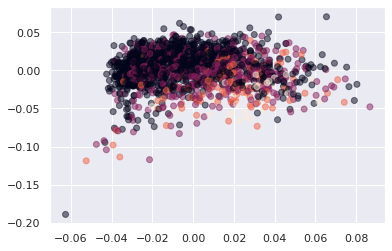

In [120]:
plt.scatter(LLE_out[:, 0], LLE_out[:, 1], alpha=0.5, c=y)

In [121]:
from sklearn.manifold import Isomap
model = Isomap(n_components=7)
isomap_out = model.fit_transform(X)
isomap_out

array([[-3.17789830e-01, -5.58629975e-03,  5.32492185e-02, ...,
         5.82057393e-02, -1.81645011e-02, -1.01406943e-02],
       [-2.90162309e-01, -2.63786518e-02,  5.23866787e-02, ...,
         5.07177524e-02, -1.49332125e-02, -6.96376870e-03],
       [-2.91161057e-01, -4.07830760e-04,  5.42705685e-02, ...,
         3.59218855e-02,  1.16475274e-02, -2.69734364e-02],
       ...,
       [ 4.22455773e-01,  9.24995935e-02,  2.77381999e-02, ...,
         1.69949915e-03, -2.63352078e-02,  1.44962966e-02],
       [ 4.43997990e-01,  1.04588893e-01,  3.94321124e-02, ...,
        -7.40364191e-02,  4.46776851e-03,  6.11322005e-03],
       [ 4.72331512e-01,  1.07730634e-01,  3.57804271e-02, ...,
        -7.90925357e-02,  4.14890402e-03, -5.41183450e-04]])

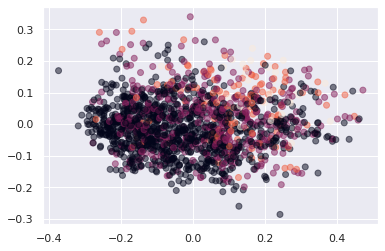

In [122]:
plt.scatter(isomap_out[:, 0], isomap_out[:, 1], alpha=0.5, c=y)

**TASK-12B:** Please develop 3 separate predictive models with respect to the datasets with reduced dimensions (but use dimension/component number as 7) in part-A. Then use 3 different algorithms to provide classification models to predict CDRGLOB and compare the outputs of these 9 models. (train-test split = 0.75 and 0.25) 3 algorithms are Gaussian Naive Bayes, SVM (rbf), and RandomForestClassifier 

For this task, please use them with their default parameter values and provide the classification report and confusion matrix for each of these.


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [124]:
#PCA - NB
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(pca_out, y, test_size=0.25, random_state=24, stratify=y)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       252
           1       0.40      0.21      0.27       106
           2       0.12      0.06      0.08        32
           3       0.08      0.10      0.09        10

    accuracy                           0.63       400
   macro avg       0.33      0.32      0.31       400
weighted avg       0.57      0.63      0.59       400



In [125]:
# LLE - NB
X_train, X_test, y_train, y_test = train_test_split(LLE_out, y, test_size=0.25, random_state=24,stratify=y)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       252
           1       0.45      0.21      0.28       106
           2       0.50      0.09      0.16        32
           3       0.04      0.10      0.06        10

    accuracy                           0.64       400
   macro avg       0.43      0.33      0.33       400
weighted avg       0.61      0.64      0.60       400



In [126]:
# ISOMAP - NB
X_train, X_test, y_train, y_test = train_test_split(isomap_out, y, test_size=0.25, random_state=24,stratify=y)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       252
           1       0.24      0.05      0.08       106
           2       0.15      0.09      0.12        32
           3       0.11      0.20      0.14        10

    accuracy                           0.62       400
   macro avg       0.30      0.32      0.28       400
weighted avg       0.52      0.62      0.54       400



In [127]:
#PCA - SVM
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(pca_out, y, test_size=0.25, random_state=24,stratify=y)
svc = SVC(kernel = 'rbf')
y_pred = svc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       252
           1       0.39      0.19      0.25       106
           2       0.25      0.06      0.10        32
           3       0.00      0.00      0.00        10

    accuracy                           0.66       400
   macro avg       0.34      0.30      0.29       400
weighted avg       0.57      0.66      0.59       400



In [128]:
#LLE - SVM
X_train, X_test, y_train, y_test = train_test_split(LLE_out, y, test_size=0.25, random_state=24, stratify=y)
svc = SVC(kernel = 'rbf')
y_pred = svc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.98      0.81       252
           1       0.38      0.11      0.17       106
           2       0.67      0.06      0.11        32
           3       0.00      0.00      0.00        10

    accuracy                           0.66       400
   macro avg       0.43      0.29      0.27       400
weighted avg       0.58      0.66      0.56       400



In [129]:
#ISOMAP - SVM
X_train, X_test, y_train, y_test = train_test_split(proj, y, test_size=0.25, random_state=24,stratify = y)
svc = SVC(kernel = 'rbf')
y_pred = svc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82       252
           1       0.43      0.19      0.26       106
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        10

    accuracy                           0.66       400
   macro avg       0.28      0.29      0.27       400
weighted avg       0.56      0.66      0.58       400



In [130]:
#PCA - RFC
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(pca_out, y, test_size=0.25, random_state=24, stratify = y)
rfc = RandomForestClassifier()
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       252
           1       0.39      0.28      0.33       106
           2       0.23      0.09      0.13        32
           3       0.00      0.00      0.00        10

    accuracy                           0.65       400
   macro avg       0.34      0.32      0.32       400
weighted avg       0.58      0.65      0.61       400



In [131]:
#LLE - RFC
X_train, X_test, y_train, y_test = train_test_split(LLE_out, y, test_size=0.25, random_state=24,stratify = y)
rfc = RandomForestClassifier()
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       252
           1       0.34      0.21      0.26       106
           2       0.23      0.09      0.13        32
           3       0.25      0.10      0.14        10

    accuracy                           0.62       400
   macro avg       0.38      0.32      0.33       400
weighted avg       0.56      0.62      0.57       400



In [132]:
#ISOMAP - RFC
X_train, X_test, y_train, y_test = train_test_split(proj, y, test_size=0.25, random_state=24,stratify = y)
rfc = RandomForestClassifier()
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       252
           1       0.39      0.21      0.27       106
           2       0.28      0.16      0.20        32
           3       0.00      0.00      0.00        10

    accuracy                           0.64       400
   macro avg       0.35      0.32      0.32       400
weighted avg       0.58      0.64      0.59       400



**TASK-12C:** Please combine these four datasets (pca-iso-lle-tsne) and then use an algorithm of your interest separately on this dataset to predict the CDRGLOB values while using grid search to optimize the hyperparameters. Please use the first 5 components from each of these 4 datasets. Please do not forget to apply minmax scaling before the dimensionality reduction operations. 

In [133]:
scaler1 = MinMaxScaler()
scaler1.fit(pca_out)
pca_out = scaler1.transform(pca_out)
pca_out

array([[0.05128152, 0.42488737, 0.15869285, ..., 0.3428699 , 0.54057262,
        0.45836107],
       [0.08855324, 0.38480047, 0.1635832 , ..., 0.33859754, 0.35558966,
        0.33857067],
       [0.09642726, 0.39133677, 0.23826401, ..., 0.32539769, 0.71204783,
        0.47694048],
       ...,
       [0.91547799, 0.52798928, 0.1046594 , ..., 0.40660141, 0.30463845,
        0.70118352],
       [0.94048188, 0.50367574, 0.26570832, ..., 0.39444272, 0.44995946,
        0.52958778],
       [1.        , 0.53481459, 0.19963972, ..., 0.25207886, 0.49820153,
        0.67346598]])

In [134]:
scaler2 = MinMaxScaler()
scaler2.fit(LLE_out)
LLE_out = scaler2.transform(LLE_out)
LLE_out

array([[0.14038459, 0.63757554, 0.52640758, ..., 0.90275691, 0.71036806,
        0.27256884],
       [0.13500673, 0.70995515, 0.39396635, ..., 0.90928874, 0.84200601,
        0.34295804],
       [0.16715846, 0.6963168 , 0.49279753, ..., 0.87044984, 0.68696086,
        0.36004272],
       ...,
       [0.91583807, 0.56741641, 0.17198171, ..., 0.74181211, 0.17414734,
        0.24639713],
       [0.94884919, 0.57634817, 0.09492936, ..., 0.75417949, 0.04386024,
        0.29312051],
       [1.        , 0.54426916, 0.        , ..., 0.72984536, 0.        ,
        0.26094363]])

In [135]:
scaler3 = MinMaxScaler()
scaler3.fit(isomap_out)
isomap_out = scaler3.transform(isomap_out)
isomap_out

array([[0.06474233, 0.44771994, 0.42868245, ..., 0.62726864, 0.27567168,
        0.33722971],
       [0.09744471, 0.41449059, 0.42592042, ..., 0.60059485, 0.28393516,
        0.35272003],
       [0.09626251, 0.45599592, 0.43195303, ..., 0.54788885, 0.35191088,
        0.2551552 ],
       ...,
       [0.94096265, 0.60447612, 0.34699088, ..., 0.42598147, 0.25477649,
        0.45735684],
       [0.96646193, 0.62379666, 0.38443721, ..., 0.15619412, 0.33354987,
        0.41648192],
       [1.        , 0.62881764, 0.37274376, ..., 0.13818317, 0.33273443,
        0.38403582]])

In [136]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, init='random', random_state=24)
tsne_out = tsne.fit_transform(X)
tsne_out

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[-12.917407 ,   5.551193 ,  10.411052 ],
       [-12.37916  ,   6.2001595,  10.23779  ],
       [-11.75767  ,   6.093154 ,  10.647108 ],
       ...,
       [  3.7394636,  -8.8319025, -12.820754 ],
       [  3.8767781,  -8.692682 , -13.22907  ],
       [  3.8624582,  -8.873549 , -13.259351 ]], dtype=float32)

In [137]:
scaler4 = MinMaxScaler()
scaler4.fit(tsne_out)
tsne_out = scaler4.transform(tsne_out)
tsne_out

array([[0.02614695, 0.71447873, 0.962783  ],
       [0.04912263, 0.743927  , 0.95600843],
       [0.07565153, 0.7390714 , 0.97201294],
       ...,
       [0.7371632 , 0.06181255, 0.05440825],
       [0.7430246 , 0.06812999, 0.03844291],
       [0.74241334, 0.05992272, 0.03725892]], dtype=float32)

In [138]:
conc = np.concatenate((pca_out[:,:5], LLE_out[:,:5], isomap_out[:,:5], tsne_out), axis=1)
conc.shape

(1600, 18)

In [139]:
param_grid = [
  {'n_estimators' : [80,50,100,150,200], 'min_samples_split' : [2,3,4] }
 ]

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(conc, y, test_size=0.25, random_state=24,stratify = y)
rfc2 = RandomForestClassifier()
clf = GridSearchCV(rfc2, param_grid)
clf.fit(X_train, y_train)
predicted = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test, predicted))

0.645


**TASK-12D:** Please use the new dataset (selected) beginning with the 16th column after scaling it with minmax scaler. Then apply the k-means algorithm on the scaled dataset for k=4 and then visualize it with respect to their labels on 2 dimensions obtained via tSNE. 

In [141]:
data2 = pd.read_excel("/content/CDR_6_MRI_selected.xlsx")
X = data2.iloc[:,15:]

In [142]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[0.34466296, 0.00276713, 0.70394774, ..., 0.38126392, 0.35275158,
        0.40716566],
       [0.38518066, 0.00241988, 0.64284949, ..., 0.57145031, 0.35370065,
        0.26270722],
       [0.40152897, 0.03786587, 0.60198398, ..., 0.44900941, 0.46514979,
        0.51360024],
       ...,
       [0.57348624, 0.08992182, 0.57822605, ..., 0.62295476, 0.48810442,
        0.32662128],
       [0.61830927, 0.13984642, 0.67399771, ..., 0.55820967, 0.36333314,
        0.25037979],
       [0.5993941 , 0.05787578, 0.70584069, ..., 0.65944561, 0.52735209,
        0.29157177]])

In [143]:
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [144]:
tsne = TSNE(n_components=2, init='random', random_state=24)
digits_proj = tsne.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = mode(data2.CDRGLOB[mask])[0]

accuracy_score(data2.CDRGLOB, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0.62875

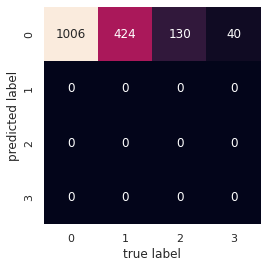

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(data2["CDRGLOB"], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

**TASK-12E:** Please use the silhouette algorithm to find the optimal number of clusters (k=2, 3, 4, …. 50). Please visualize the silhouette scores within this range and decide the most appropriate cluster number. Then apply the suitable cluster number using K-means. 

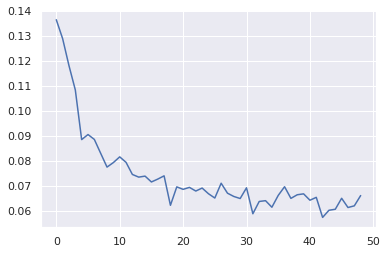

In [146]:
from sklearn.metrics import silhouette_samples, silhouette_score
list_SS = []
for no_clusters in range(2,51):

    clusterer = KMeans(n_clusters=no_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    list_SS.append(silhouette_avg)
plt.plot(list_SS)

In [147]:
clusterer = KMeans(n_clusters=12, random_state=10)
cluster_labels_12 = clusterer.fit_predict(X)

In [148]:
cluster_labels_12

array([ 7, 10,  7, ..., 11,  9,  9], dtype=int32)

In [149]:
data2.pivot_table( "HIPPOVOL", index=cluster_labels_12, columns=data2["CDRGLOB"])

CDRGLOB,0,1,2,3
0,0.005557,0.005380,0.005373,0.004901
1,0.006223,0.006122,0.005864,0.006596
2,0.006851,0.006753,0.006928,0.006023
3,0.006143,0.005970,0.005836,0.005594
4,0.006549,0.006488,0.006012,NaN
5,0.006647,0.006626,0.006465,0.007127
6,0.005269,0.004856,0.004526,0.004529
7,0.006457,0.006352,0.006178,NaN
8,0.005902,0.005839,0.005649,0.005929
9,0.006138,0.006287,0.006080,NaN


In [150]:
data2.pivot_table( "HIPPOVOL", index=cluster_labels_12, columns=data2["CDRGLOB"], aggfunc = "count")

CDRGLOB,0,1,2,3
0,60.0,50.0,22.0,7.0
1,134.0,39.0,7.0,2.0
2,80.0,33.0,3.0,1.0
3,125.0,36.0,10.0,4.0
4,20.0,11.0,3.0,NaN
5,106.0,36.0,2.0,2.0
6,8.0,27.0,31.0,11.0
7,100.0,44.0,3.0,NaN
8,162.0,42.0,4.0,2.0
9,57.0,27.0,6.0,NaN


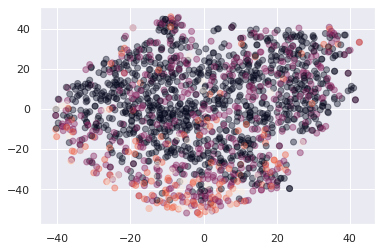

In [151]:
plt.scatter(digits_proj[:,0], digits_proj[:,1], c=data2["CDRGLOB"], alpha=0.4)

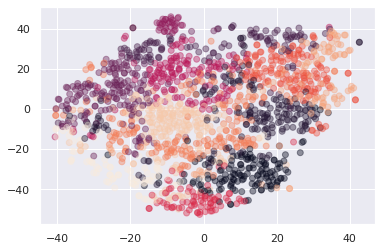

In [152]:
plt.scatter(digits_proj[:,0], digits_proj[:,1], c=cluster_labels_12, alpha=0.4)

**TASK-12F:** Please use the final dataset but this time add the following columns and then run the model with grid search optimization:SEX
INDEPEND
NPISCORE
FAQ


In [153]:
data_4_columns = data2[['SEX', 'INDEPEND', 'NPISCORE', 'FAQ']].to_numpy()

final_dataset = np.concatenate((conc, data_4_columns), axis = 1)

In [154]:
final_dataset.shape

(1600, 22)

In [155]:
param_grid = [
  {'n_estimators' : [80,50,100,150,200], 'min_samples_split' : [2,3,4] }
 ]

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(final_dataset, y, test_size=0.25, random_state=24,stratify = y)
rfc2 = RandomForestClassifier()
clf = GridSearchCV(rfc2, param_grid)
clf.fit(X_train, y_train)
predicted = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test, predicted))

0.805


**TASK-12G:** Then for comparison purposes, use only these four columns to develop a model):

SEX INDEPEND NPISCORE FAQ

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(data_4_columns, y, test_size=0.25, random_state=224,stratify = y)
rfc2 = RandomForestClassifier()
clf = GridSearchCV(rfc2, param_grid)
clf.fit(X_train, y_train)
predicted = clf.best_estimator_.predict(X_test)
print(clf.best_score_)
print(accuracy_score(y_test, predicted))

0.8158333333333333
0.81


In [158]:
print(accuracy_score(y_train, clf.predict(X_train)))

0.8808333333333334
